## Supervised Learning: Challenge

In this challenge, we will try to predict credit card fraud.

Download the data from [here](https://drive.google.com/file/d/1FCQY1SiWIjh_ME6Wtb3FG8Y1sKoRwAUc/view?usp=sharing). The data is originally from a [Kaggle Competition](https://www.kaggle.com/mlg-ulb/creditcardfraud).

The dataset contains transactions made by credit cards within two days in September 2013 by European cardholders.  Where **we have 492 occurrences of fraud out of the total of 284,807 transactions**. This dataset is highly unbalanced, with the positive class (frauds) account for 0.172% of all transactions.

____________________
### **Challenge:** Identify fraudulent credit card transactions.

Features V1, V2, … V28 are the principal components obtained with PCA. The only features that are not transformed with PCA are `'Time'` and `'Amount'`.  

- The feature `'Time'` contains the seconds elapsed between each transaction and the first transaction in the dataset.
- The feature `'Amount'` is the transaction amount; this feature can be used for example-dependant cost-sensitive learning. 
- The feature `'Class'` is the target variable, and it takes the value of 1 in case of fraud and 0 otherwise.

> #### Warning
> There is a huge class imbalance ratio, so we need to be careful when evaluating. It might be better to use the method `.predict_proba()` with a custom cut-off to search for fraudulent transactions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

# Data Exploring

In [2]:
data = pd.read_csv('data/creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Data cleaning

In [6]:
# Check for duplicates
data_d = data.copy()
data_d.drop_duplicates(inplace=True)
data_d.shape

(283726, 31)

In [7]:
# Remove duplicates
data = data_d
del data_d

In [8]:
data.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

## Split Data

In [10]:
X_columns = data.columns[:-1]

X = data[X_columns]
y = data['Class']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Model fitting

In [12]:
clfs = {}
preds = {}

In [21]:
def evaluate_model(model,preds):
    print(f"{model} Accuracy: {metrics.accuracy_score(y_test, preds[model])}")
    print(f"{model} Recall: {metrics.recall_score(y_test, preds[model])}")
    print(f"{model} Precision: {metrics.precision_score(y_test, preds[model])}")

    metrics.ConfusionMatrixDisplay.from_predictions(y_test, preds[model])
    plt.show()

### SVM

#### Poly

In [13]:
clfs['svm_poly'] =  SVC(kernel='poly')

In [14]:
clfs['svm_poly'].fit(X_train, y_train)

SVC(kernel='poly')

In [15]:
preds['svm_poly'] = clfs['svm_poly'].predict(X_test)

#### RBF

In [16]:
clfs['svm_rbf'] =  SVC(kernel='rbf')

In [17]:
clfs['svm_rbf'].fit(X_train, y_train)

SVC()

In [18]:
preds['svm_rbf'] = clfs['svm_rbf'].predict(X_test)

#### Sigmoid

In [19]:
clfs['svm_sigmoid'] =  SVC(kernel='sigmoid')

In [20]:
clfs['svm_sigmoid'].fit(X_train, y_train)

SVC(kernel='sigmoid')

In [21]:
preds['svm_sigmoid'] = clfs['svm_sigmoid'].predict(X_test)

### Naive Bayes

In [14]:
clfs['naive_bayes'] = GaussianNB()

In [15]:
clfs['naive_bayes'].fit(X_train, y_train)

GaussianNB()

In [16]:
preds['naive_bayes'] = clfs['naive_bayes'].predict(X_test)

naive_bayes Accuracy: 0.9933386592730092
naive_bayes Recall: 0.6086956521739131
naive_bayes Precision: 0.1407035175879397


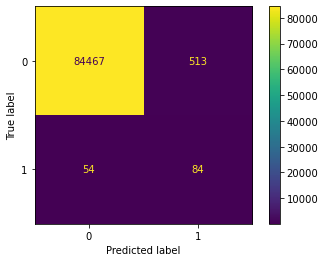

In [22]:
evaluate_model('naive_bayes', preds)

In [23]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]
y_scores = clfs['naive_bayes'].predict_proba(X_test)[:,1]
preds['naive_bayes_thres'] = adjusted_classes(y_scores, 0.001)

naive_bayes_thres Accuracy: 0.9906130313212247
naive_bayes_thres Recall: 0.7318840579710145
naive_bayes_thres Precision: 0.11703360370799537


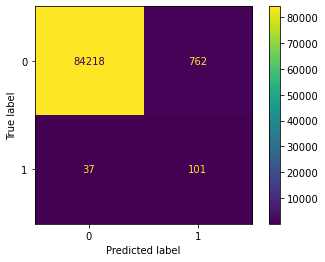

In [24]:
evaluate_model('naive_bayes_thres', preds)

#### Random Forest

In [32]:
clfs['random_forest'] = RandomForestClassifier(n_estimators=300)

In [33]:
clfs['random_forest'].fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [34]:
preds['random_forest'] = clfs['random_forest'].predict(X_test)

random_forest Accuracy: 0.9994830705608685
random_forest Recall: 0.7391304347826086
random_forest Precision: 0.9272727272727272


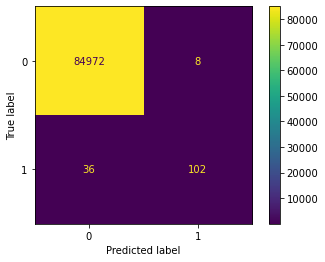

In [35]:
evaluate_model('random_forest', preds)

In [49]:
y_scores = clfs['random_forest'].predict_proba(X_test)[:,1]
preds['random_forest_thres'] = adjusted_classes(y_scores, 0.001)

random_forest_thres Accuracy: 0.9497756056298315
random_forest_thres Recall: 0.9202898550724637
random_forest_thres Precision: 0.02892279662946937


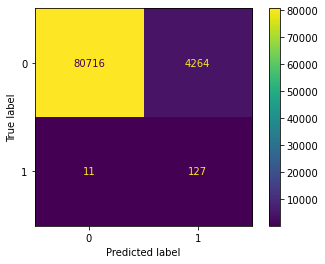

In [50]:
evaluate_model('random_forest_thres', preds)

#### Grid Search

In [14]:
n_estimators = [100, 200, 300, 400, 500]
class_weights = [{1: 1},
                 {1: 10},
                 {1: 100},
                 {1: 1000}
                ]


param_grid = {'n_estimators': n_estimators, 
              'class_weight': class_weights}

grid = GridSearchCV(estimator=RandomForestClassifier(),scoring='recall', param_grid=param_grid, n_jobs=-1)

# uncomment to kill cpu
#grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': [{1: 1}, {1: 10}, {1: 100}, {1: 1000}],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='recall')

In [16]:
print(f"Best class_weight: {grid.best_estimator_}")
preds['random_forest_300'] = grid.predict(X_test)

Best class_weight: RandomForestClassifier(class_weight={1: 1}, n_estimators=300)


In [38]:
import pickle

In [41]:

with open('random_forest.pkl', 'wb') as f:
    pickle.dump(clfs['random_forest'], f)



In [46]:

# and later you can load it
with open('random_forest_300.pkl', 'rb') as f:
    clfs['random_forest_grid'] = pickle.load(f)

EOFError: Ran out of input

In [30]:
y_scores = clfs['random_forest_grid'].predict_proba(X_test)[:,1]
preds['random_forest_300_thres'] = adjusted_classes(y_scores, 0.05)

/home/kyle/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [31]:
evaluate_model('random_forest_grid', preds)

KeyError: 'random_forest_grid'

# Model Evalutation

In [17]:
def evaluate_model(model,preds):
    print(f"{model} Accuracy: {metrics.accuracy_score(y_test, preds[model])}")
    print(f"{model} Recall: {metrics.recall_score(y_test, preds[model])}")
    print(f"{model} Precision: {metrics.precision_score(y_test, preds[model])}")
    metrics.ConfusionMatrixDisplay.from_predictions(y_test, preds[model])
    plt.show()


In [42]:
evaluate_model('naive_bayes', preds)

naive_bayes Accuracy: 0.9928569750229094
naive_bayes Recall: 0.6714285714285714
naive_bayes Precision: 0.14329268292682926


AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_predictions'